<a href="https://colab.research.google.com/github/210317/Machine-Learning-and-Deep-Learning-projects/blob/main/Copy_of_Task_2_Machine_learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install libraries
!pip install opendatasets
!pip install pandas
!pip install matplotlib
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Download dataset
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamed992002
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 3.72MB/s]

In [ ]:
# Upload dataset
df = pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
print("Data Overview")
df.head()
print("Data Statics")
df.info()
df.describe()

Data Overview
Data Statics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


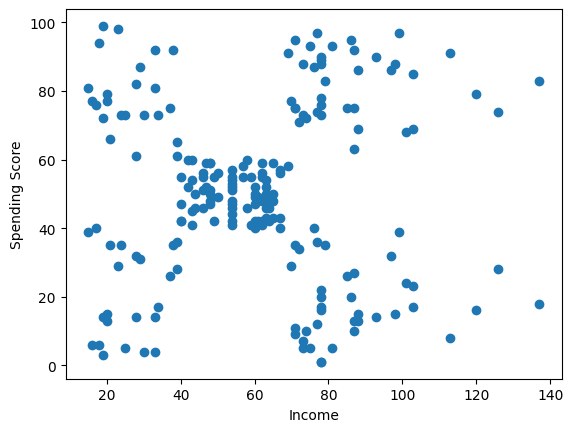

In [ ]:
# plot the axis
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# Perform Scaling and visual exploration of grouping
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
print("Scaling Statistics:")

Scaling Statistics:


In [ ]:
# Find optimal k using eblow method
wcss = []
k_range = range(2, 11)
for i in k_range:
  KM = KMeans(n_clusters = i, random_state = 42, n_init = 10)
  KM.fit(X_scaled)
  wcss.append(KM.inertia_)



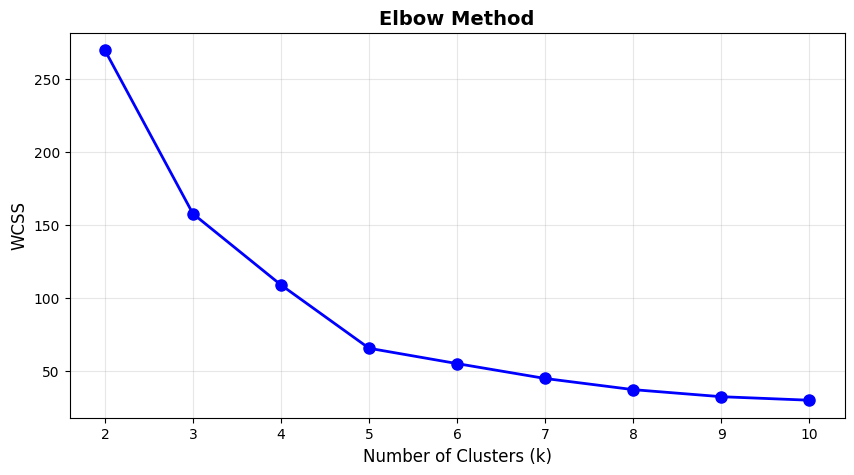

In [ ]:
# plot the elbow curve
plt.figure(figsize=(10,5))
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method', fontsize=14, fontweight='bold')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Train the final model with optimistic k
optimal_k = 5  # Based on elbow plot
km = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = km.fit_predict(X_scaled)

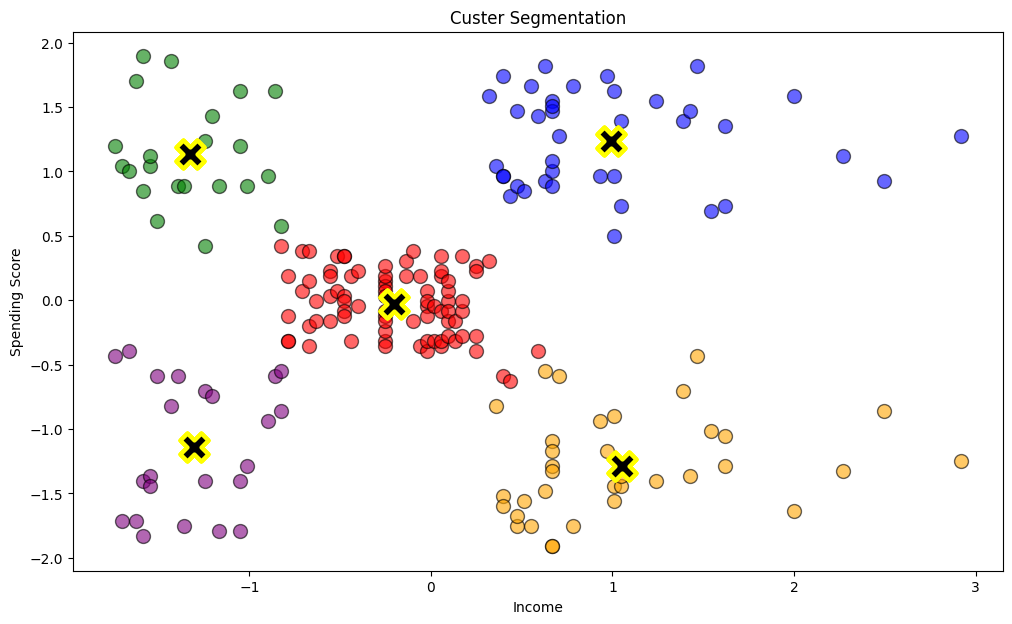

In [ ]:
# Visualizations
plt.figure(figsize=(12, 7))
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Custer Segmentation')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(optimal_k):
  cluster_data = X_scaled[clusters == i]
  plt.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.6,
        s=100,
        edgecolors='black'
    )

  centers = km.cluster_centers_
  plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    s=400,
    marker='X',
    edgecolors='yellow',
    linewidths=3,
    label='Centroids',
    zorder=5
)
